For image clasification, what are the benefits of using convolutional layers instead of dense layers for image classification

-- Convolutional layers have much more less parameters so they train faster and weight less. For its architecture the convolutional layer can process images of any size (unless the filters size cannot fit it). also it can reduce the image's dimensionality in order to achieve better processing. But the fact that it processes matrixes to learn patterns in two dimensions is their best advantage, they do not require the inputs to be transformed into 1d.

* Because consecutive layers are only partially connected and because it heavily reuses its weights, a CNN has many fewer parameters than a fully connected DNN, which makes it much faster to train, reduces the risk of overfitting, and requires much less training data.

* When a CNN has learned a kernel that can detect a particular feature, it can detect that feature anywhere in the image. In contrast, when a DNN learns a feature in one location, it can detect it only in that particular location. Since images typically have very repetitive features, CNNs are able to generalize much better than DNNs for image processing tasks such as classification, using fewer training examples.

* Finally, a DNN has no prior knowledge of how pixels are organized; it does not know that nearby pixels are close. A CNN's architecture embeds this prior knowledge. Lower layers typically identify features in small areas of the images, while higher layers combine the lower-level features into larger features. This works well with most natural images, giving CNNs a decisive head start compared to DNNs.


When using stride in the convolutional neural networks, the upper layers use less parameters, so it is cheaper to compute complex features.

-- Consider a CNN composed of three convolutional layers, each with 3 × 3 kernels, a stride of 2, and "same" padding. The lowest layer outputs 100 feature maps, the middle one outputs 200, and the top one outputs 400. The input images are RGB images of 200 × 300 pixels:

a. What is the total number of parameters in the CNN?
b. If we are using 32-bit floats, at least how much RAM will this network require when making a prediction for a single instance?
c. What about when training on a mini-batch of 50 images?



Inputs: Examplesx200x300x3

Layer 1:
Kernel 3X3
Stride 2
Padding: Same
Filters 100

Layer 2:
Input: Examples x 100 x 100 x 150
Filters 200

Layer 3:
Input: Examples x 400 x 50 x 75
Filters 400

#### Parameters

First Layer
Inputs are (3x3 (kernel size) * 3 (input channels) + 1 (BIAS)) x 100 (filter number) = 2.800 parameters
RAM Consumed: 100 x 200x300 x 32 = 192.000.000 = 24mb

Second layer
((3 x 3) (100) + 1(BIAS)) x 200 = 180.200 parameters
RAM Consumed: 200 x 100x150 x 32 = 96.000.000 = 12mb

Third layer
((3 x 3 ) (200) + 1(BIAS)) x 400 = 720.400 parameters
RAM Consumed: 400 x 50x75 x 32 = 48.000.000 = 6mb

Total = 183.000 + 720.400 = 903.400 parameters


#### RAM Usage for predicting an instance
Step 1, calculate the feature map size for each layer:

Layer one: 
Padding same
Stride 2
The feature map divides by two de size of the input, rounding up if necessary because of the padding same 

First Layer Feature Maps = 200 x 300 / 2 = 100 x 150

Second Layer Feature Maps = 100 x 150 / 2 = 50 x 75

Third Layer Feature Maps = 50 x 75 / 25 x 38

First layer RAM =  (4 bytes) x (100 x 150 feature maps size) x 100 (feature map number) = 6.000.000 bytes / 1.000.000 = 6 mega bytes

Second Layer RAM = 4 x 50 x 75 x 200 = 3.000.000 bytes / 1.000.000 = 3 mb

Third Layer RAM = 4 x 25 x 38 x 400 = 3.000.000 = 1.520.000 = 1.5 mb

When predicting the RAM used is the max sum of two layers: 10.5mb

And to that, summed the weight of the parameters loaded in memory: 903.400 parameters x 4 (bytes) = 3.613.600 (3.6 mb)

Total RAM = 12.6mb

#### RAM used for training
RAM used by all layers per instance = 3.6 all the parameters
10.5mb of layers per instance
525mb per all instances

For each input image the ram needed is 50 (200 x 300 x 3 x 4) 36.000.000 / 1.000.000 = 36mb

Plus the ram used by the gradients but i will skip because this is a good minimum estimation

total is: 571,5

-- What happends if a GPU run out of memory during trainning?

The mini batch size should decrease the amount of RAM needed
Also reducing the dimensionality using stride lowers the RAM needed by layers
Removing layers can reduce the RAM, or use less pressision in floats and distribute the CNN cross multiple devices

-- Why would you want to add a max pooling layer rather than a convolutional layer with the same stride?

The max poolling layer does not hold parameters for the feature maps so it saves memory, and its output gives invariance to the network. 

-- When would you want to add a local response normalization layer?
It is a way of generalization, it tears separates what is learned by neighboor filters, lowering patterns that are already in the brother layers of the current one. It is most likely used in the first layers in order to get several low level patterns.

-- Can you name the main innovations in AlexNet, as compared to LeNet-5? What about the main innovations in GoogLeNet, ResNet, SENet, Xception, and EfficientNet?
#### *AlexNet*
- 2012, it was the first to stack convolutional layers, instead of putting some max pooling layer and then a convolutional one. It also was larger and deeper than LeNet-5.
To reduce overfitting, the authors used two regularization techniques. First, they applied dropout with a 50% dropout rate during training to the outputs of layers F9 and F10. Second,they performed data augmentation by randomly shifting the training images by various offsets, flipping them horizontally, and changing the lighting conditions
- AlexNet also uses a competitive normalization step immediately after the ReLU step of layers C1 and C3, called local response normalization (LRN). the most strongly activated neurons inhibit other neurons located at the same position in neighboring feature maps. Such competitive activation has been observed in biological neurons. This encourages different feature maps to specialize, pushing them apart and forcing them to explore a wider range of features, ultimately improving generalization

#### *GoogLeNet*
Much deeper than previous CNN. This was made possible by submodules called inception modules that allowed this architecture to use parameters in a more efficient way than before. It has 10 times fewer parameters than AlexNet (6million instead of 60 millions).
*The inception Module* The input signal is fed to four different paths in paralel that correspond to convolutional layers with the relu activation function. The top convolutional layers allow them to capture patterns at different scales. Stride 1 and same padding, even the max pooling one. This makes it possible to concatenate all the outputs along the depth dimension in the final depth concatenation layer (example: stack the feature maps from all four top convolutional layers). it can be implemented using Kera's concatenate layer, with default axis = -1. 

The four paths of the inception module from right to left are:
Max pool 3x3 + 1(S) and Convolutional 1x1 + 1(s)
Convolutional 1x1 + 1(S) and Convolutional 5x5 + 1(s)
Convolutional 1x1 + 1(S) and Convolutional 3x3 + 1(s)
Convolutional 1x1 + 1(s)

And the final is a depth concat

The 1x1 layers are a nice way to use a convolutional layer, they cant capture any patter because they look pixel by pixel. Its purpose is to catch patterns across several filters, or the depth dimension, because it outputs a linear combination of all of them for each pixel. They are also configured to output fewer feature maps than their inputs, so they are bottleneck layers that reduce dimensionality, computational cost and parameters. Each pair of convolutionals 1x1 and 5x5 or 3x3 represents a powerful convolutional layer by themselves, if a convolutional layer is the equivalent of sweeping a dense layer across the image (at each location, it only looks at a small receptive field), and these pairs of convolutional layers are equivalent to sweeping two-layer neural networks across the image. Actually, the whole inception module is a great convolutional layer capable of capturing complex patterns at several scales.

Its other peculiarity is to have a 40% dropout layer.

#### *ResNet*
The ResNet was presented in 2015 and it has 152 layers being extremly deep that confirmed a trend of making deeper and deeper convolutional neural networks with fewer and fewer parameters. The key of this neural network is that it *skips connections* which is useful because when trainning a neural network the goal is to make it model a target function
h(x). If you add the input x to the output of the network it will be forced to model f(x) = h(x) - x instead of h(x), so when h(x) weights are initialized (most close to zero) it
initially models the identity function. If the target function is fairly close to the identity function (which is often the case), this will speed up training considerably. Moreover, if you add many skip connections, the network can start making progress even if several layers have not started learning yet. Thanks to skip connections, the signal can easily make its way across the whole network. The deep residual network can be seen as a stack of *residual units (RUs)*, where each residual unit is a small neural network with a skip connection.
Each basic residual unit has two 3×3 convolutional layers with batch normalization and rectified linear unit activation, using stride 1 and “same” padding to keep width and height unchanged. When the network downsamples, it doubles the number of feature maps while halving spatial size via a stride-2 convolution; the skip path is projected with a 1×1 convolution (also stride 2) so input and output shapes match for the addition. A common configuration, ResNet-34, uses these basic units in stages of 3, 4, 6, and 3 units that produce 64, 128, 256, and 512 feature maps, respectively. Deeper variants, such as ResNet-152, switch to a bottleneck residual unit composed of a 1×1 convolution to reduce depth (for example to 64 maps), a 3×3 convolution at that reduced depth, and a final 1×1 convolution to restore depth (for example to 256 maps), arranged in stages of 3, 8, 36, and 3 units that output 256, 512, 1,024, and 2,048 maps. The entry and exit of the network mirror the general pattern used in GoogLeNet, with the core difference being the extensive use of residual connections throughout.

#### *XCeption*
It is a variant of GoogLeNet proposed in 2016 by François Chollet who also happends to be the author of Keras, and of which we all are thankful. It replaces the *Inception Modules* with a special type of layer called a *depthwise separable convolution layer*. While a common convolutional layer uses filters to try to capture spatial patterns (geometrics figures for example) and cross-channel patterns (a face), a separable convolutional layer makes the strong assumption that spatial patterns and cross-channel patterns can be modeled separately and so, it is composed of two parts: The first is a single spatial filter to each input feature map and then the second part looks exclusively for cross-channel patterns like a convolutional layer with 1x1 filters.

*Separable convolutional layers* have only one spatial filter per input channel, so they should not be used after layers with too few channels like the input one. For this reasong the architecture starts with 2 regular convolutional layers, but then the rest of the architecture uses only separable convolutions (34), plus a few max pooling layers and the usual final layers. 

The Xception is considered a varian of GoogLeNet because inception module contains 1x1 convolutional layers that search for cross dimensional pattern exclusively and the regular  convolutional layer that is on top of the 1x1 layers look for spatial patterns, so the separable convolutional layer is an intermediate between these two kind of layers. Separable convolutional layers use fewer parameters, less memory, and fewer computations than regular convolutional layers, and they often perform better.

#### *SeNet*
Squeeze-and-excitation network It applied a boots to previous architectures las Resnet or Inception, what it does is to add a *small neural network called SE Block* to every *inception module* or *residual unit* in the original architecture. The SE block analyzes the output of the unit attached to, focusing on the depth dimension only and learning which features are usually most active together. It then recalibrates the feature maps based on this data. For example: An SE may learn that mouths, noses and eyes usually appear together in pictures. If you see a mouth and a nose, you should expect to see eyes as well. If the block sees a high activation in the mouth and eyes feature map, it wil also raise the nose feature map. What it does actually is to reduce the irrelevant feature maps. 

The block is composed of three layers, global average pool first, then a dense layer with relu activation and a dense output layer with sigmoid activation. The average layer computes the mean activation for each feature map, if the input contains 200 feature maps, it will output 200 numbers with the average activation in each map. The idea of the next layer is that it has much less neurons than 200, learning a general representation of the feature combinations. And then the output layers takes the embedding layer and outputs a recalibration vector containing one number per feature map, each between 0 and 1. The feature maps are multiplied by this recalibration vector causing the strong ones to be higher than the lower ones.


#### *EfficientNet*
Is a method to scale any net efficiently. The steps are increasing the number of layers, number of filters per layer and the size of the input image in a principled way. 

EfficientNet uses compound scaling based on a logarithmic compute budget φ: when compute doubles, φ increases by 1 (FLOPs ∝ 2^φ). Depth, width, and resolution scale as α^φ, β^φ, and γ^φ, with α, β, γ > 1 and α·β^2·γ^2 ≈ 2 to balance cost. Starting from EfficientNetB0 with φ = 1, a grid search found α = 1.2, β = 1.1, γ = 1.1, which were then used to build larger models EfficientNetB1–B7 for increasing φ.


- What is a fully convolutional network? How can you convert a dense layer into a convolutional layer?
It was designed for semantic segmentation (classfying all the pixels in an image depending on its object). The idea is to replace the dense layer on top of a convolutional neural network with convolutional layers. 

Dense layer
200 neurons
top of convolutional layer outputs 100 feature maps of size 7x7 (feature map size, not kernel size)

Each neuron will compute weighted sum of all 100x7x7 activations from the conv layer plus a bias term. 

Replacing the dense layer with a Convolutional one
200 filters
7x7
valid padding
output 200 feature maps each 1x1 because its kernel size is exacly 7x7 as the previous layer output

The output will be 200 numbers just like the dense layer. 

The computations made by a convolutional layer make the same numbers as the dense layer. The difference is that the dense layer outputs [batch_size, 200] and this one [batch_size, 1,1, 200]

To convert a dense layer to a convolutional layer, the number of filters in the convolutional layer myst be equal to the number of units in the dense layer, the filter size must be equal to the size of the input feature maps, and valid padding must be used, and a stride of 1 or more.

The advantage of the CNN is that it processes any image size, it will not expect its input to have a number of channels. 

Witch a CNN for clasification and localization: it was trained on 224 x 224 images and outputs 10 numbers:

- Outputs 0 to 4 correspond to the softmax activation for class probabilities. 
- Output 5 is sent to the sigmoid activation for objectness score.
- Outputs 6 and 7 represent the bounding boxs center coordinates; they also go though a sigmoid activation function to ensure 0 to 1 values.
- Outputs 8 and 9 represent bounding boxs widht and height. They dont go through any activation function to allow the bounding boxes to extend beyond the border of the images

To convert a dense layer to a convolutional layer copying the weights from one to another is enough.

The best advantage is that the convolutional output layer outputs the 10 result values for all the image at once look.

- #### What is the main technical difficulty of semantic segmentation?

Semantic Segmentation classifies each pixel to each object it belongs to. The main difficulty is when images go through a regular CNN, they gradually lose their spatial resolution due to strides freater than 1. a regular CNN can know that a person is in the image, and its position but not much more than that.

Solutions:
Take a CNN and turn it to a FCN. The cnn strides 32 to the image, so they added a technique of upsampling that multiplied the resolution by 32.

Bilinear interpoilation (x4 or x8)

Transposed convolutional layer: first stretch the image with empty rows and columns (full of zeros), then performing a regular convolution (fractional strides 1/2). It learns during training. Its ok but too imprecise, to get it better what should be done is to add skip connections from lower layers. 
In the best architecture, they used a second similar skip connection to recover even finer details from an even lower layer. In short, the output of the original CNN goes through the following extra steps: upsample ×2, add the output of a lower layer (of the appropriate scale), upsample ×2, add the output of an even lower layer, and finally upsample ×8. It is even possible to scale up beyond the size of the original image: this can be used to increase the resolution of an image, which is a technique called super-resolution.

In a transposed convolutional layer, the stride defines how much the input will be stretched, not the size of the filter steps, so the larger the stride, the larger the output (unlike for convolutional layers or pooling layers).

Instance segmentation is similar to semantic segmentation, but instead of merging all objects of the same class into one big lump, each object is distinguished from the others 




In [23]:
import tensorflow as tf
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


mnist = tf.keras.datasets.mnist

(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()

x_train_full = (x_train_full / 255).astype("float32")
x_test = (x_test / 255).astype("float32")

#Split the data into train, validation and test sets
x_valid, x_train = x_train_full[:5000], x_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

x_valid = x_valid[..., np.newaxis]
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

print(x_train.shape)
print(y_test.shape)

(55000, 28, 28, 1)
(10000,)


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_valid, y_valid))
model.evaluate(x_test, y_test)

Epoch 1/20
430/430 [==============================] - 15s 34ms/step - loss: 0.5564 - accuracy: 0.8259 - val_loss: 0.1944 - val_accuracy: 0.9414
Epoch 2/20
430/430 [==============================] - 14s 34ms/step - loss: 0.1515 - accuracy: 0.9539 - val_loss: 0.1148 - val_accuracy: 0.9682
Epoch 3/20
430/430 [==============================] - 14s 33ms/step - loss: 0.1019 - accuracy: 0.9687 - val_loss: 0.0894 - val_accuracy: 0.9756
Epoch 4/20
430/430 [==============================] - 14s 32ms/step - loss: 0.0788 - accuracy: 0.9760 - val_loss: 0.0902 - val_accuracy: 0.9726
Epoch 5/20
430/430 [==============================] - 14s 32ms/step - loss: 0.0653 - accuracy: 0.9801 - val_loss: 0.0623 - val_accuracy: 0.9840
Epoch 6/20
430/430 [==============================] - 14s 32ms/step - loss: 0.0541 - accuracy: 0.9834 - val_loss: 0.0606 - val_accuracy: 0.9834
Epoch 7/20
430/430 [==============================] - 14s 32ms/step - loss: 0.0458 - accuracy: 0.9853 - val_loss: 0.0462 - val_accuracy:

[0.031130339950323105, 0.9909999966621399]

In [26]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 3, 3, 128)        

313/313 [==============================] - 1s 4ms/step


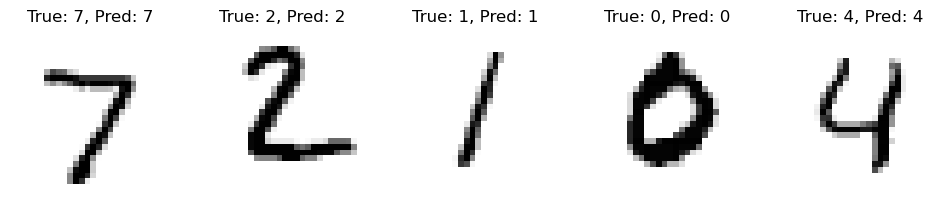

In [ ]:

def plot_result(predictions, images, labels):
    plt.figure(figsize=(12, 12))
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap="binary")
        plt.axis("off")
        label_predicted = np.argmax(predictions[i])
        plt.title(f"True: {labels[i]}, Pred: {label_predicted}")
    

predictions = model.predict(x_test)

plot_result(predictions, x_test, y_test)

In [34]:
secondModel = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=4, padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=64, kernel_size=4, padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=128, kernel_size=4, padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=128, kernel_size=4, padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=256, kernel_size=4, padding="same", activation="relu"),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(10, activation="softmax")
])


secondModel.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
secondModel.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_valid, y_valid))
secondModel.evaluate(x_test, y_test)
secondModel.summary()

Epoch 1/20
430/430 [==============================] - 33s 75ms/step - loss: 0.2610 - accuracy: 0.9134 - val_loss: 0.0664 - val_accuracy: 0.9802
Epoch 2/20
430/430 [==============================] - 32s 74ms/step - loss: 0.0506 - accuracy: 0.9845 - val_loss: 0.0449 - val_accuracy: 0.9864
Epoch 3/20
430/430 [==============================] - 33s 77ms/step - loss: 0.0334 - accuracy: 0.9891 - val_loss: 0.0345 - val_accuracy: 0.9896
Epoch 4/20
430/430 [==============================] - 32s 74ms/step - loss: 0.0248 - accuracy: 0.9923 - val_loss: 0.0675 - val_accuracy: 0.9800
Epoch 5/20
430/430 [==============================] - 34s 79ms/step - loss: 0.0181 - accuracy: 0.9942 - val_loss: 0.0291 - val_accuracy: 0.9912
Epoch 6/20
430/430 [==============================] - 33s 77ms/step - loss: 0.0155 - accuracy: 0.9950 - val_loss: 0.0349 - val_accuracy: 0.9916
Epoch 7/20
430/430 [==============================] - 33s 76ms/step - loss: 0.0119 - accuracy: 0.9959 - val_loss: 0.0316 - val_accuracy:

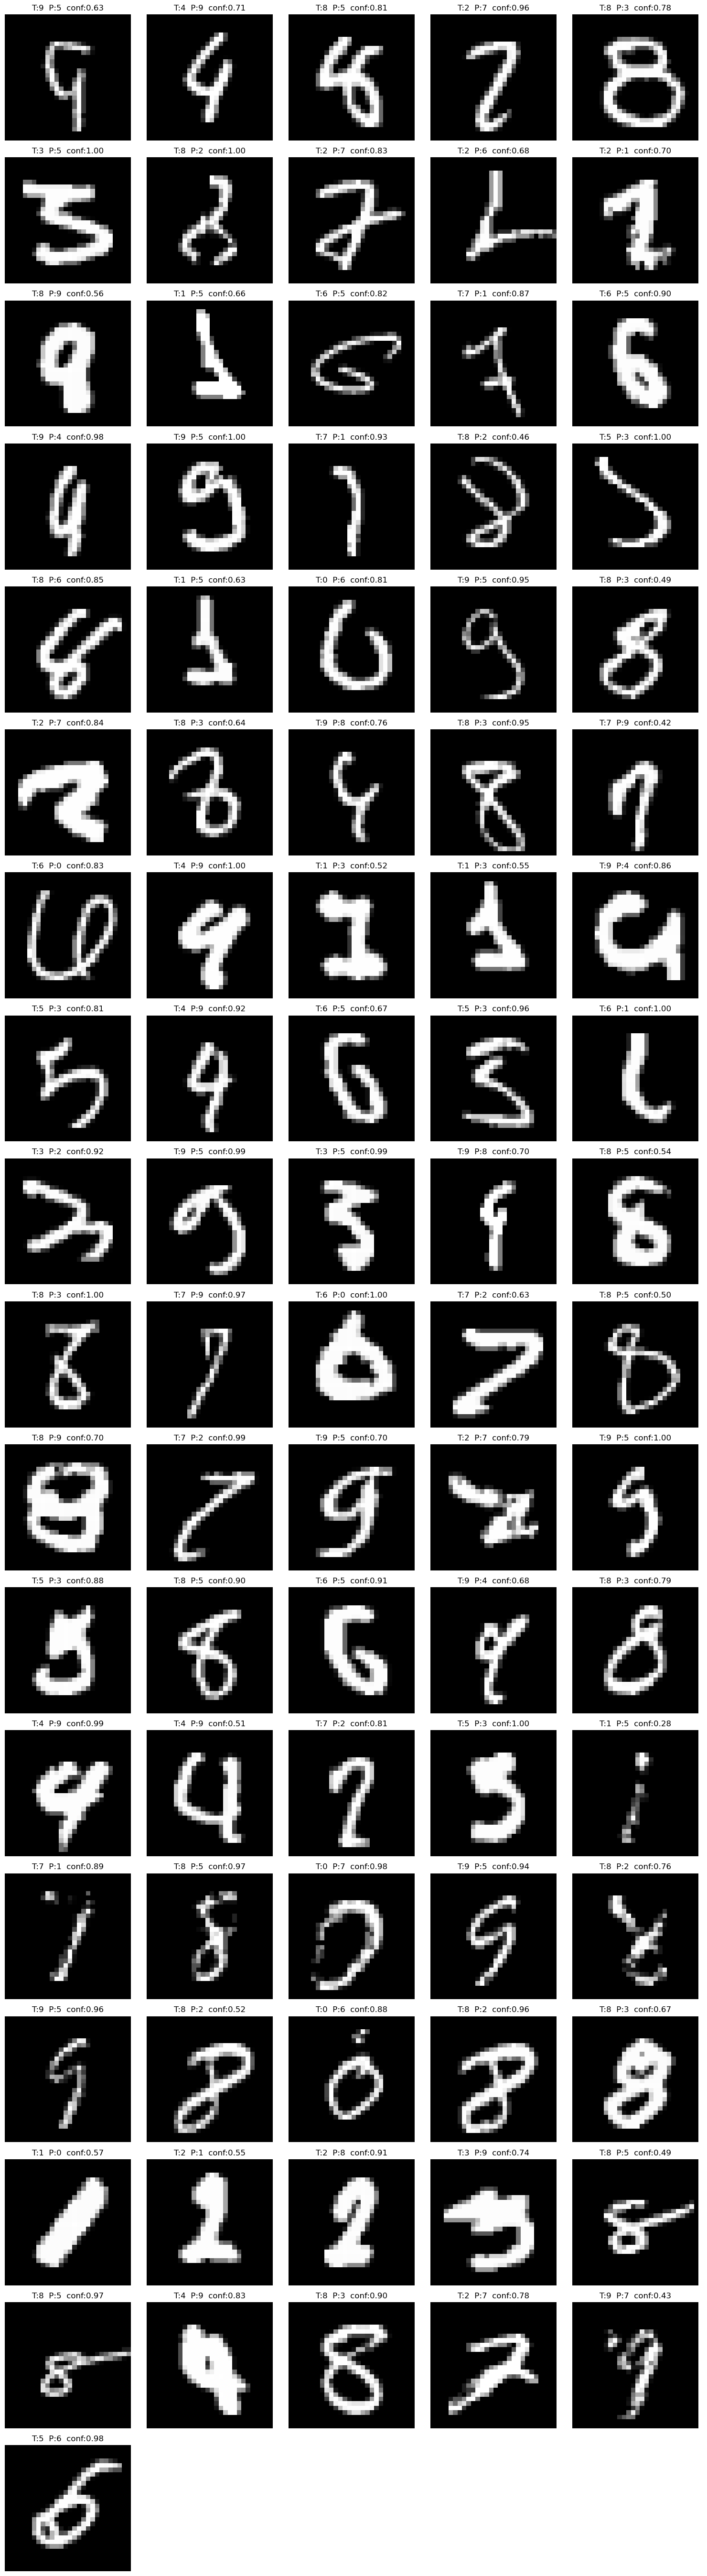

In [51]:
import numpy as np, math, matplotlib.pyplot as plt

# y_pred y errores
y_pred = predictions.argmax(axis=1)
wrong_idx = np.where(y_pred != y_test)[0]

# cuántas mostrar
n = len(wrong_idx)  # cambia 25 por el número que quieras
cols = 5
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(3*cols, 3*rows))
axes = np.atleast_1d(axes).ravel()

for ax, idx in zip(axes, wrong_idx[:n]):
  img = x_test[idx].squeeze()   # [28,28] o [28,28,1] -> [28,28]
  ax.imshow(img, cmap='gray')
  ax.set_title(f'T:{y_test[idx]}  P:{y_pred[idx]}  conf:{predictions[idx].max():.2f}')
  ax.axis('off')

for ax in axes[n:]:
  ax.axis('off')

plt.tight_layout()
plt.show()

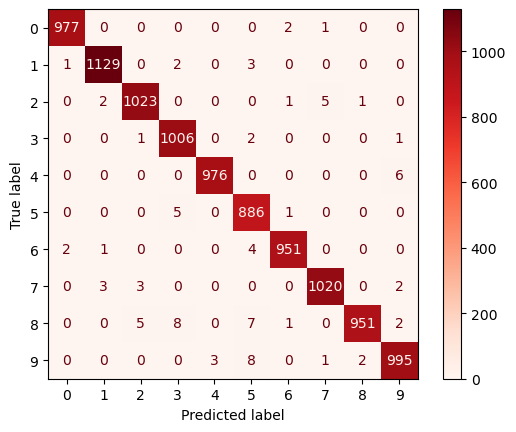

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = predictions.argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='Reds', values_format='d')
plt.show()

In [56]:
import pandas as pd
y_pred = predictions.argmax(1)
conf = predictions.max(1)
wrong = np.where(y_pred != y_test)[0]
df = pd.DataFrame({
  'index': wrong,
  'true': y_test[wrong],
  'pred': y_pred[wrong],
  'conf': conf[wrong],
}).sort_values('conf', ascending=False)
df.head(len(wrong))

index  true  pred      conf
5     449     3     5  0.999552
31   2130     4     9  0.999515
45   3062     8     3  0.999499
6     582     8     2  0.999476
63   5937     5     3  0.999471
..    ...   ...   ...       ...
24   1774     8     3  0.486490
18   1364     8     2  0.455961
84   9692     9     7  0.430474
29   2070     7     9  0.423173
64   6572     1     5  0.277345

[86 rows x 4 columns]

Use transfer learning for large image classification, going through these steps: 

a. Create a training set containing at least 100 images per class. For example, you could classify your own pictures based on the location (beach, mountain, city, etc.), or alternatively you can use an existing dataset (e.g., from TensorFlow Datasets). 

b. Split it into a training set, a validation set, and a test set.

c. Build the input pipeline, apply the appropriate preprocessing operations, and optionally add data augmentation.

d. Fine-tune a pretrained model on this dataset.

In [13]:
import tensorflow as tf
import tensorflow_datasets as tfds
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from typing import TYPE_CHECKING
if TYPE_CHECKING:
    import tf_keras as keras  # v1 / v2  # LSP supported import
else:
    from tensorflow import keras  # runtime behavior


(dataset_train, dataset_valid, dataset_test), dataset_info = tfds.load('stanford_dogs', split=["train[:10%]", "train[10%:25%]", "train[25%:]"], shuffle_files=True,
            with_info=True, as_supervised=True)

In [19]:
batch_size = 32



preprocess = tf.keras.Sequential([
    tf.keras.layers.Resizing(height=218, width=178, crop_to_aspect_ratio=True),
    tf.keras.layers.Lambda(tf.keras.applications.xception.preprocess_input)
])

train_set = dataset_train.map(lambda X, y: (preprocess(X), y))
train_set = train_set.shuffle(1000, seed=42).batch(batch_size).prefetch(1)
valid_set = dataset_valid.map(lambda X, y: (preprocess(X), y)).batch(batch_size)
test_set = dataset_test.map(lambda X, y: (preprocess(X), y)).batch(batch_size)

def make_pipeline(dataset, training=True):
    if training:
        dataset = dataset.shuffle(1024, seed=42, reshuffle_each_iteration=True).batch(32)
    dataset = dataset.map(lambda data: preprocess(data, training=training),  
                                            num_parallel_calls=tf.data.AUTOTUNE)

dataset_size = dataset_info.splits["train"].num_examples
n_classes = dataset_info.features["label"].num_classes
class_names = dataset_info.features["label"].names

print(dataset_size, n_classes)
class_names

12000 120


['n02085620-chihuahua',
 'n02085782-japanese_spaniel',
 'n02085936-maltese_dog',
 'n02086079-pekinese',
 'n02086240-shih-tzu',
 'n02086646-blenheim_spaniel',
 'n02086910-papillon',
 'n02087046-toy_terrier',
 'n02087394-rhodesian_ridgeback',
 'n02088094-afghan_hound',
 'n02088238-basset',
 'n02088364-beagle',
 'n02088466-bloodhound',
 'n02088632-bluetick',
 'n02089078-black-and-tan_coonhound',
 'n02089867-walker_hound',
 'n02089973-english_foxhound',
 'n02090379-redbone',
 'n02090622-borzoi',
 'n02090721-irish_wolfhound',
 'n02091032-italian_greyhound',
 'n02091134-whippet',
 'n02091244-ibizan_hound',
 'n02091467-norwegian_elkhound',
 'n02091635-otterhound',
 'n02091831-saluki',
 'n02092002-scottish_deerhound',
 'n02092339-weimaraner',
 'n02093256-staffordshire_bullterrier',
 'n02093428-american_staffordshire_terrier',
 'n02093647-bedlington_terrier',
 'n02093754-border_terrier',
 'n02093859-kerry_blue_terrier',
 'n02093991-irish_terrier',
 'n02094114-norfolk_terrier',
 'n02094258-norwi

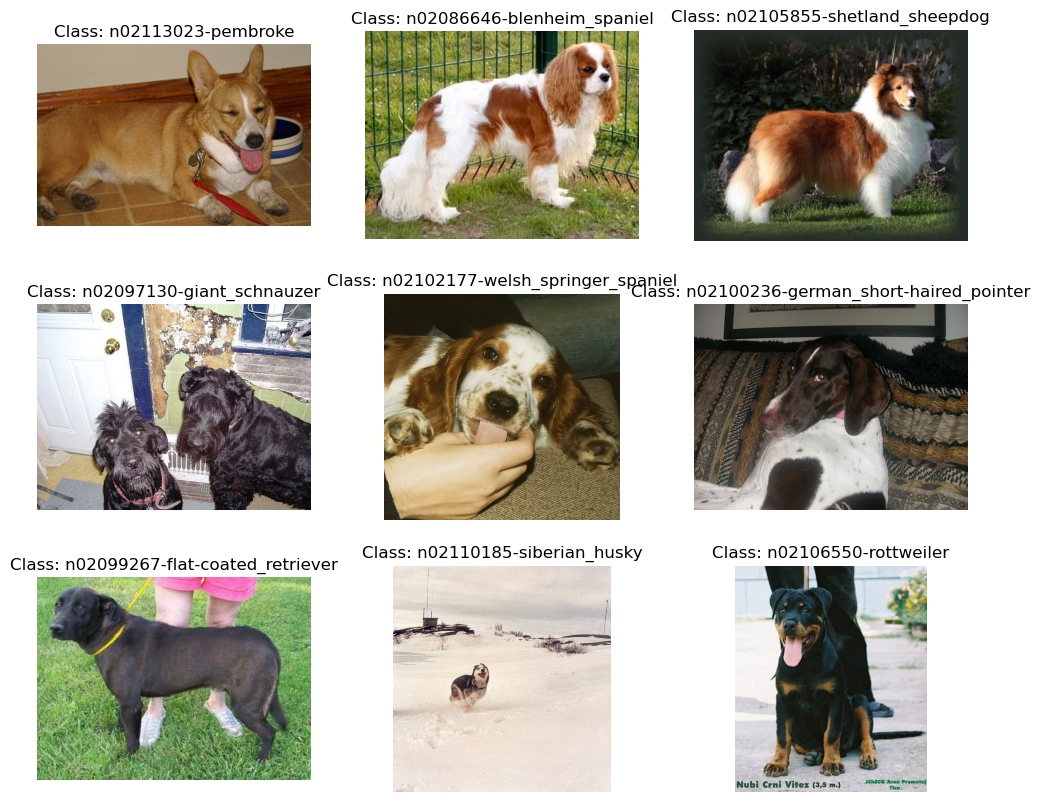

In [20]:
plt.figure(figsize=(12, 10))
index = 0
for image, label in dataset_test.take(9):
    index += 1
    plt.subplot(3, 3, index)
    plt.imshow(image)
    plt.title(f"Class: {class_names[label]}")
    plt.axis("off")

plt.show()

In [26]:
dataset_train.take(1).element_spec

(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [35]:
for ex in dataset_train.take(1):
    print(ex)


(<tf.Tensor: shape=(500, 333, 3), dtype=uint8, numpy=
array([[[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [19, 17, 20],
        [19, 17, 20],
        [19, 17, 20]],

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [19, 17, 20],
        [19, 17, 20],
        [19, 17, 20]],

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [19, 17, 20],
        [19, 17, 20],
        [19, 17, 20]],

       ...,

       [[19, 19, 19],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [23, 21, 22],
        [24, 22, 23],
        [24, 22, 23]],

       [[19, 19, 19],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [22, 20, 21],
        [22, 20, 21],
        [23, 21, 22]],

       [[19, 19, 19],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [21, 19, 20],
        [21, 19, 20],
        [22, 20, 21]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, n

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip(mode="horizontal", seed=42),
    tf.keras.layers.RandomRotation(factor=0.05, seed=42),
    tf.keras.layers.RandomContrast(factor=0.2, seed=42)
])

plt.figure(figsize=(12, 12))
for X_batch, y_batch in valid_set.take(1):
    X_batch_augmented = data_augmentation(X_batch, training=True)
    for index in range(9):
        plt.subplot(3, 3, index + 1)
        # We must rescale the images to the 0-1 range for imshow(), and also
        # clip the result to that range, because data augmentation may
        # make some values go out of bounds (e.g., RandomContrast in this case).
        plt.imshow(np.clip((X_batch_augmented[index] + 1) / 2, 0, 1))
        plt.title(f"Class: {class_names[y_batch[index]]}")
        plt.axis("off")

plt.show()

Como es comun el tamaño de los valores de las imagenes está entre 0 y 255 (int8 es el tipo de dato)

In [80]:
tf.keras.backend.clear_session()  # extra code – resets layer name counter


#Now let's load the pretrained model, without its top layers, and replace them with our own, for the flower classification task:
tf.random.set_seed(42)  # extra code – ensures reproducibility
base_model = tf.keras.applications.xception.Xception(weights="imagenet",
                                                     include_top=False)
                                                     
avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(n_classes, activation="softmax")(avg)
model = tf.keras.Model(inputs=base_model.input, outputs=output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, None, None, 32)       864       ['input_1[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, None, None, 32)       128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, None, None, 32)       0         ['block1_conv1_bn[0][0]'] 

In [37]:
for layer in base_model.layers:
    layer.trainable = False

In [39]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
model.fit(train_set, validation_data=valid_set, epochs=10)


Epoch 1/10
38/38 [==============================] - 74s 2s/step - loss: 3.2801 - accuracy: 0.3567 - val_loss: 1.5599 - val_accuracy: 0.7094
Epoch 2/10
38/38 [==============================] - 71s 2s/step - loss: 0.7357 - accuracy: 0.8658 - val_loss: 0.9034 - val_accuracy: 0.7722
Epoch 3/10
38/38 [==============================] - 71s 2s/step - loss: 0.3531 - accuracy: 0.9383 - val_loss: 0.7815 - val_accuracy: 0.7989
Epoch 4/10
38/38 [==============================] - 75s 2s/step - loss: 0.2301 - accuracy: 0.9667 - val_loss: 0.7486 - val_accuracy: 0.7939
Epoch 5/10
38/38 [==============================] - 70s 2s/step - loss: 0.1608 - accuracy: 0.9817 - val_loss: 0.7374 - val_accuracy: 0.7922
Epoch 6/10
38/38 [==============================] - 67s 2s/step - loss: 0.1241 - accuracy: 0.9933 - val_loss: 0.7321 - val_accuracy: 0.7917
Epoch 7/10
38/38 [==============================] - 66s 2s/step - loss: 0.0969 - accuracy: 0.9983 - val_loss: 0.7181 - val_accuracy: 0.7972
Epoch 8/10
38/38 [==

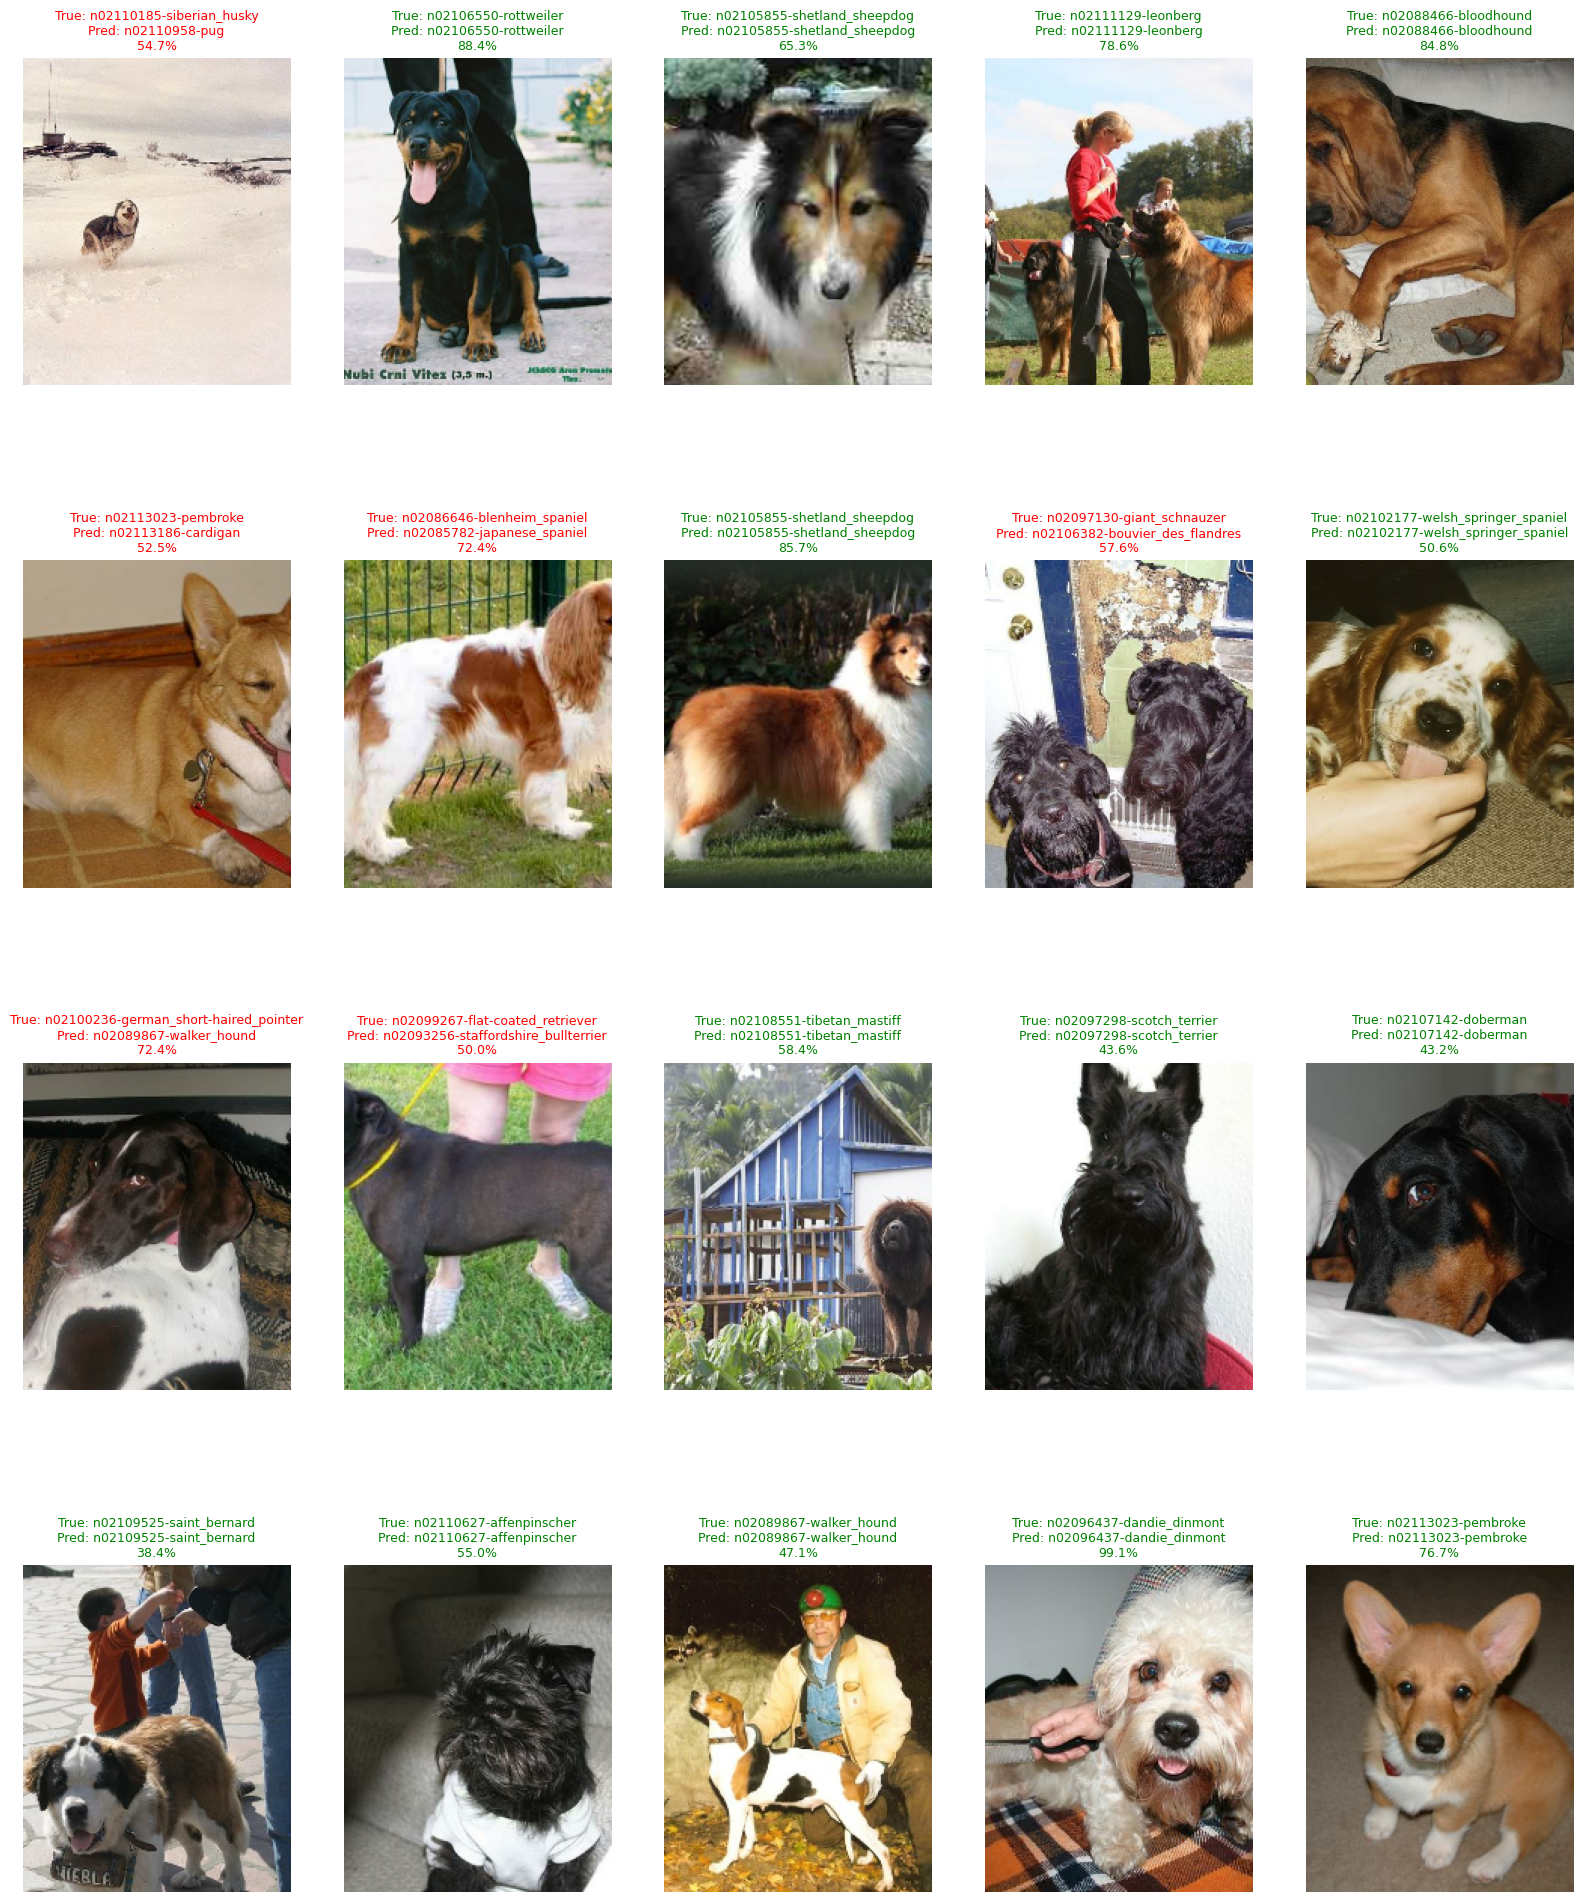

In [96]:
model.save("xception_dogs_model_no_augmentation.keras")

plt.figure(figsize=(20, 25))
for idx, (ex, label) in enumerate(dataset_test.take(20).map(lambda x, y: (preprocess(x), y))):
    img = tf.expand_dims(ex, 0)
    pred = model.predict(img, verbose=0)
    predicted_class = np.argmax(pred[0])
    confidence = pred[0][predicted_class]
    
    plt.subplot(4, 5, idx + 1)
    img_display = (ex + 1) / 2.0  # Desnormaliza de [-1, 1] a [0, 1]
    img_display = np.clip(img_display, 0, 1)  # Asegura que esté en [0, 1]
    plt.imshow(img_display)
    color = 'green' if predicted_class == label else 'red'
    plt.title(f"True: {class_names[label]}\nPred: {class_names[predicted_class]}\n{confidence:.1%}", 
             color=color, fontsize=9)
    plt.axis("off")


## With data augmentation

In [88]:
tf.keras.backend.clear_session()  # extra code – resets layer name counter

#Now let's load the pretrained model, without its top layers, and replace them with our own, for the flower classification task:
tf.random.set_seed(42)  # extra code – ensures reproducibility

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip(mode="horizontal", seed=42),
    tf.keras.layers.RandomRotation(factor=0.05, seed=42),
    tf.keras.layers.RandomContrast(factor=0.2, seed=42)
])

#En la API funcional de Keras, cada llamada a una capa devuelve un tensor que se pasa a la siguiente, 
# formando un grafo conectado. Reasignar a x es solo una conveniencia; el grafo se construye igual.
base_model = tf.keras.applications.xception.Xception(weights="imagenet", include_top=False)

for layer in base_model.layers:
    layer.trainable = False



input = tf.keras.layers.Input(shape=(218, 178, 3))
x = data_augmentation(input)
x = base_model(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(n_classes, activation="softmax")(x)


model = tf.keras.Model(inputs=input, outputs=outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 218, 178, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 218, 178, 3)       0         
                                                                 
 xception (Functional)       (None, None, None, 2048   20861480  
                             )                                   
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 120)               245880    
                                                                 
Total params: 21107360 (80.52 MB)
Trainable params: 245880 (9

In [89]:
optimizer = tf.keras.optimizers.legacy.Nadam(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
model.fit(train_set, validation_data=valid_set, epochs=10)

Epoch 1/10
38/38 [==============================] - 64s 2s/step - loss: 4.2178 - accuracy: 0.1358 - val_loss: 2.6505 - val_accuracy: 0.4789
Epoch 2/10
38/38 [==============================] - 60s 2s/step - loss: 2.3262 - accuracy: 0.5050 - val_loss: 1.6940 - val_accuracy: 0.5950
Epoch 3/10
38/38 [==============================] - 58s 2s/step - loss: 1.5415 - accuracy: 0.7008 - val_loss: 1.3809 - val_accuracy: 0.6300
Epoch 4/10
38/38 [==============================] - 59s 2s/step - loss: 1.1864 - accuracy: 0.7742 - val_loss: 1.2519 - val_accuracy: 0.6628
Epoch 5/10
38/38 [==============================] - 64s 2s/step - loss: 0.9381 - accuracy: 0.8350 - val_loss: 1.2043 - val_accuracy: 0.6533
Epoch 6/10
38/38 [==============================] - 60s 2s/step - loss: 0.7731 - accuracy: 0.8767 - val_loss: 1.2105 - val_accuracy: 0.6506
Epoch 7/10
38/38 [==============================] - 60s 2s/step - loss: 0.6172 - accuracy: 0.9150 - val_loss: 1.1877 - val_accuracy: 0.6694
Epoch 8/10
38/38 [==

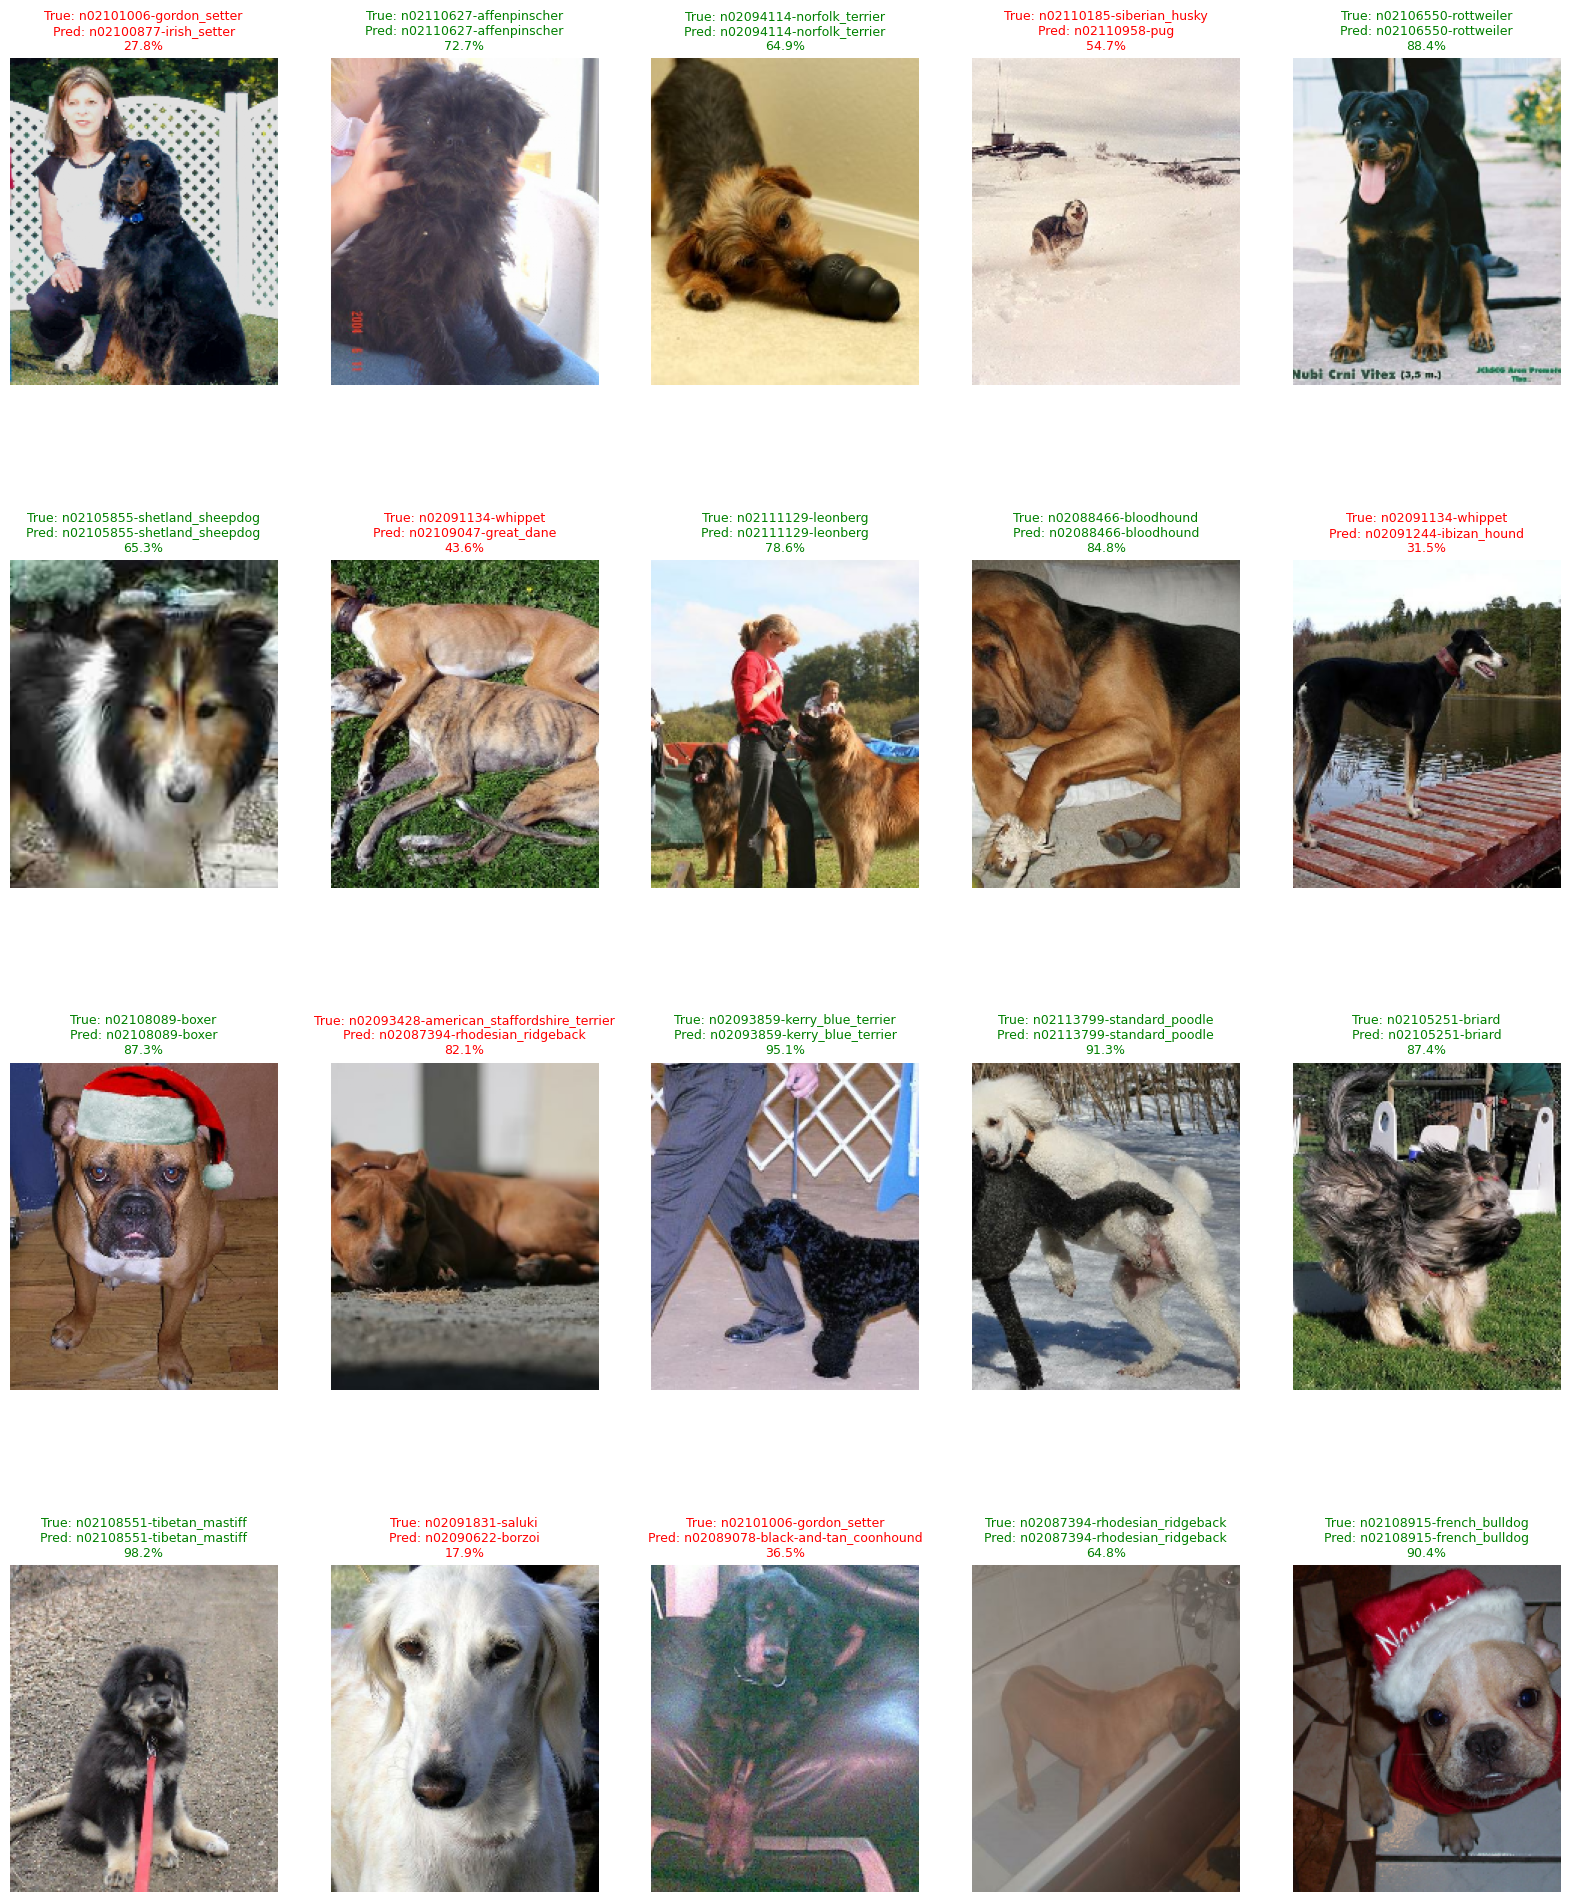

In [ ]:
tf.keras.backend.clear_session()  # extra code – resets layer name counter

plt.figure(figsize=(20, 25))
for idx, (image, label) in enumerate(dataset_test.take(20).map(lambda x, y: (preprocess(x), y))):
    processed_image = tf.expand_dims(image, 0)
    pred = model.predict(processed_image, verbose=0)
    predicted_class = np.argmax(pred[0])
    confidence = pred[0][predicted_class]
    
    plt.subplot(4, 5, idx + 1)
    img_display = (image + 1) / 2.0  # Desnormaliza de [-1, 1] a [0, 1]
    img_display = np.clip(img_display, 0, 1)  # Asegura que esté en [0, 1]
    plt.imshow(img_display)
    color = 'green' if predicted_class == label else 'red'
    plt.title(f"True: {class_names[label]}\nPred: {class_names[predicted_class]}\n{confidence:.1%}", 
             color=color, fontsize=9)
    plt.axis("off")

plt.show()


In [94]:
#save the models
model.save("xception_dogs_model.keras")